___
# Projeto 3 - CD
___

## Regressão linear que agrupa diferentes tipos de músicas de acordo com sua dançabilidade.

O objetivo desse projeto é fazer diferentes agrupamentos de músicas do Spotify, utilizando a regressão linear, levando em consideração o quão dançável é a música. Queremos analisar o tamanho obtido e as diferenças das quantidades de músicas em determinados grupos.

Exemplo de aplicação da técnica: https://www.kaggle.com/noemir/dimension-reduction-of-music-pref-in-progress/comments 

**Nomes das integrantes:**
Rebeca Moreno,
Giulia Passarelli e
Carla Kim

In [51]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import expon
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

In [52]:
#lendo a planilha de dados
sptdata = pd.read_csv("data.csv")

#ajustando a quantidade de termos que precisamos usar
spotdata = sptdata[0:100]
spotdatatreina = sptdata[100:200]
spotdata.energy = sptdata.energy[0:100]

Dicionário dos dados:
https://www.kaggle.com/nyartsgnaw/analyzing-gender-differences/data

In [110]:
spotdata.notakey = spotdata.key
spotdata.notakey = spotdata.notakey.astype('category')
spotdata.notakey.cat.categories = (['C','C♯, D♭','D','D♯, E♭','E','F','F♯, G♭','G','G♯, A♭','A','A♯, B♭','B'])

#tabela de frequência das notas (key)
#spotdata.energy.value_counts()/100
pd.crosstab(spotdata.notakey,'Frequências', colnames=['Notas musicais'])

Notas musicais,Frequências
key,
C,10
"C♯, D♭",16
D,13
"D♯, E♭",2
E,3
F,8
"F♯, G♭",5
G,9
"G♯, A♭",5


//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

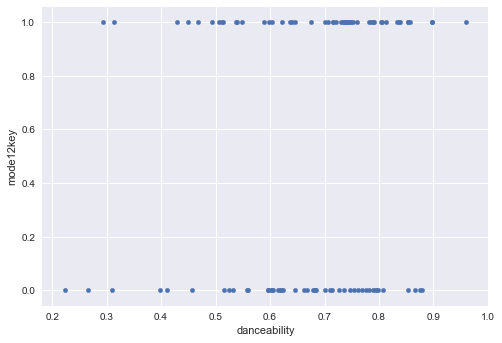

In [4]:
#para o treinamento do computador dos 100 primeiros termos
spotdata['mode12key'] = spotdata['mode']*12 + spotdata['key']

spotdata['mode12key'] = np.where(spotdata.mode12key >= spotdata['mode12key'].mean(), 1, 0)

#para o teste dos novos termos de 100 a 200
spotdata['mode12keytreina'] = spotdatatreina['mode']*12 + spotdatatreina['key']
spotdata['mode12keytreina'] = np.where(spotdata.mode12keytreina >= spotdata['mode12keytreina'].mean(), 1, 0)

#plot do gráfico 
spotdata.plot(kind = "scatter", x = "danceability", y = "mode12key")

## **Part 2:** Predicting a Categorical Response

In [5]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['danceability']
X = spotdata[feature_cols]
y = spotdata.mode12key
logreg.fit(X, y)
spotdata['mode12key_pred_class'] = logreg.predict(X)

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


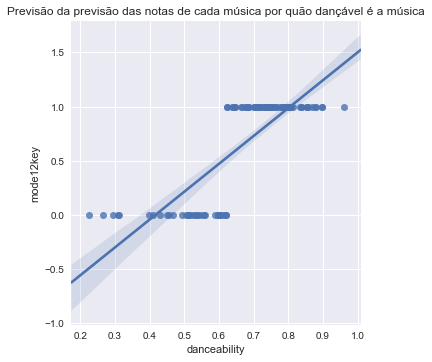

In [6]:
sns.lmplot('danceability','mode12key_pred_class',spotdata)
plt.title('Previsão da previsão das notas de cada música por quão dançável é a música')
plt.xlabel('danceability')
plt.ylabel('mode12key')

In [7]:
spotdata['mode12key_pred_prob'] = logreg.predict_proba(X)[:, 1]

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


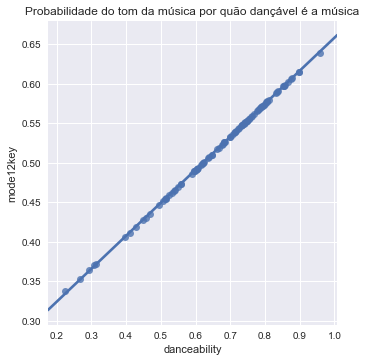

In [8]:
sns.lmplot(x = 'danceability', y='mode12key_pred_prob', data=spotdata)
plt.title('Probabilidade do tom da música por quão dançável é a música')
plt.xlabel('danceability')
plt.ylabel('mode12key')

O gráfico de probabilidade nos diz que, para uma dançabilidade menor, a chance de a música ter um tom menor e ter as notas iniciais (mais próximas de dó (key 0 = C)) é maior que a outra chance.

In [9]:
# examine some example predictions
print(logreg.predict_proba(0.2))
print(logreg.predict_proba(0.5))
print(logreg.predict_proba(0.8))

[[ 0.67173525  0.32826475]]
[[ 0.55153401  0.44846599]]
[[ 0.4249947  0.5750053]]


A primeira coluna 